In [48]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os


In [27]:
def calibration_plot(pred_dict,true,fig = None,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for name in pred_dict:
        pred = pred_dict[name]
        true_calibrated, pred_calibrated = calibration_curve(true, pred, n_bins=15)
        # plot perfectly calibrated
        # plot model reliabilities
        ax.plot(true_calibrated, pred_calibrated, marker='.', label = name)
    ax.plot([0, 1], [0, 1], linestyle='--', color='black')
    #ax.set_xlabel('True probabilities')
    #ax.set_ylabel('Predicted probabilities')
    fig.text(0.5, 0.04, 'Observation', ha='center', va='center')
    fig.text(0.06, 0.5, 'Prediction', ha='center', va='center', rotation='vertical')
    #ax.legend(bbox_to_anchor=(0,0))
    #ax.legend()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
    
def programs_calibration_plot(iqtree_data,raxml_data,fasttree_data):  
    fig,axs = plt.subplots(ncols=1, nrows=3 )
    calibration_plot({'IQTREE ML model':iqtree_data['predictions_full_standard'],
    'IQTREE aLRT test':iqtree_data['predictions_feature_aLRT_iqtree_support_raw_boot'],
                  'IQTREE Ultrafast':iqtree_data['predictions_bootstrap_support_raw_boot'],
                 'IQTREE aBayes test':iqtree_data['predictions_feature_aBayes_iqtree_support_raw_boot'],
                 }, iqtree_data["true_binary_support"],fig,axs[0])


    calibration_plot({
                  'RAxML ML model':raxml_data['predictions_full_standard'],
    'RAxML bootstrap':raxml_data['predictions_bootstrap_support_raw_boot'],
                 }, raxml_data["true_binary_support"],fig,axs[1])


    calibration_plot({
                  'Fasttree ML model':fasttree_data['predictions_full_standard'],
    'Fasttree SH test':fasttree_data['predictions_bootstrap_support_raw_boot'],
                 }, fasttree_data["true_binary_support"],fig,axs[2])


    plt.show()
    
    


In [21]:
iqtree_test_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/iqtree/final_model/test.tsv",sep='\t')
raxml_test_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/raxml/final_model/test.tsv",sep='\t')
fasttree_test_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/fasttree/final_model/test.tsv",sep='\t')

iqtree_val_upgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/iqtree/final_model/val_upgrade.tsv",sep='\t')
raxml_val_upgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/raxml/final_model/val_upgrade.tsv",sep='\t')
fasttree_val_upgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/fasttree/final_model/val_upgrade.tsv",sep='\t')

iqtree_val_downgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/iqtree/final_model/val_downgrade.tsv",sep='\t')
raxml_val_downgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/raxml/final_model/val_downgrade.tsv",sep='\t')
fasttree_val_downgrade_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/fasttree/final_model/val_downgrade.tsv",sep='\t')

iqtree_val_standard_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/iqtree/final_model/val_standard.tsv",sep='\t')
raxml_val_standard_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/raxml/final_model/val_standard.tsv",sep='\t')
fasttree_val_standard_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/fasttree/final_model/val_standard.tsv",sep='\t')



#fasttree_final_models_performance = read_tsv(paste(prefix,"ML_results/fasttree/final_model_performance.tsv", sep = ""))

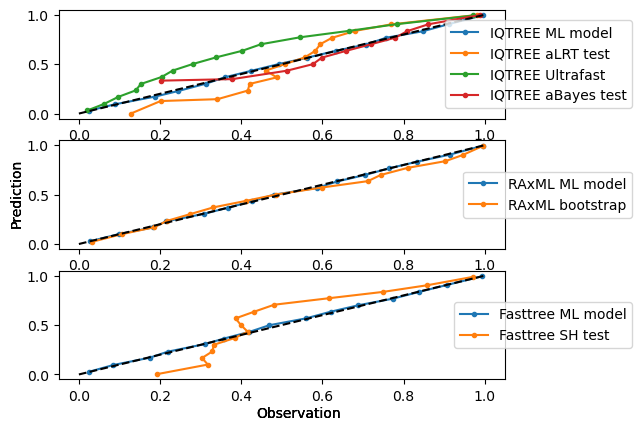

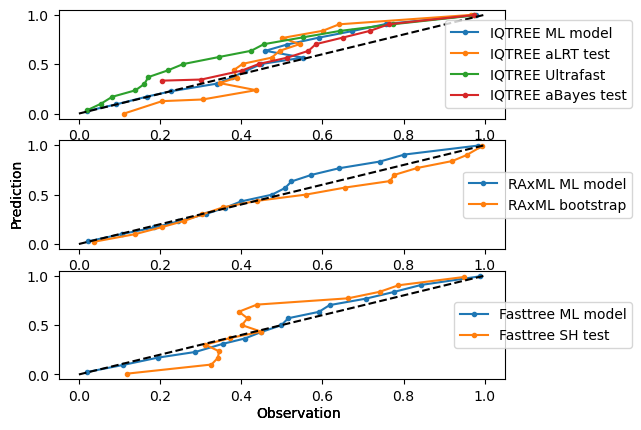

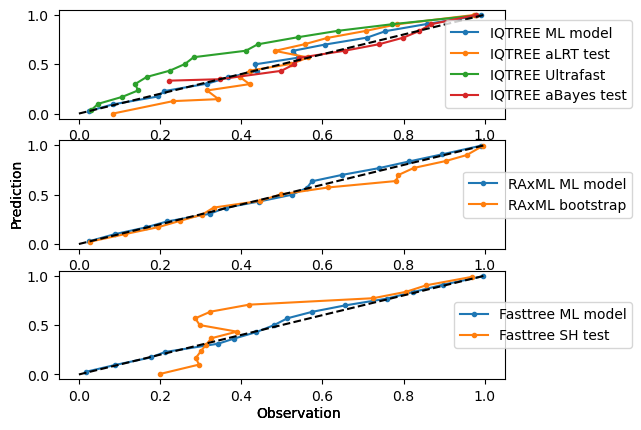

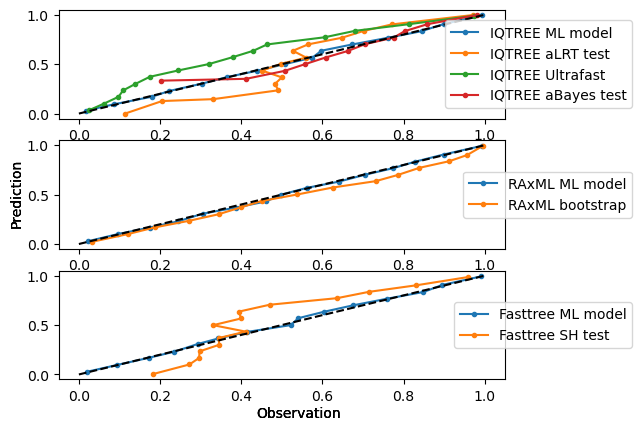

In [28]:
programs_calibration_plot(iqtree_test_data,raxml_test_data,fasttree_test_data)
programs_calibration_plot(iqtree_val_downgrade_data,raxml_val_downgrade_data,fasttree_val_downgrade_data)
programs_calibration_plot(iqtree_val_upgrade_data,raxml_val_upgrade_data,fasttree_val_upgrade_data)
programs_calibration_plot(iqtree_val_standard_data,raxml_val_standard_data,fasttree_val_standard_data)




In [14]:
from sklearn.metrics import roc_curve

def roc_comp_plot(pred_dict, true,fig = None,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for name in pred_dict:
        pred = pred_dict[name]
        fpr , tpr, thresholds = roc_curve(true, pred)
        ax.plot(fpr, tpr, label = name)
    ax.plot([0,1],[0,1], 'k--')

    fig.text(0.5, 0.04, 'FPR', ha='center', va='center')
    fig.text(0.06, 0.5, 'TPR', ha='center', va='center', rotation='vertical')
    #ax.legend(bbox_to_anchor=(0,0))
    #ax.legend()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
    


def programs_roc_plots(iqtree_data,raxml_data,fasttree_data):
    fig,axs = plt.subplots(ncols=1, nrows=3 )
    roc_comp_plot({'IQTREE ML model':iqtree_data['predictions_full_standard'],
        'IQTREE aLRT test':iqtree_data['predictions_feature_aLRT_iqtree_support_raw_boot'],
                      'IQTREE Ultrafast':iqtree_data['predictions_bootstrap_support_raw_boot'],
                     'IQTREE aBayes test':iqtree_data['predictions_feature_aBayes_iqtree_support_raw_boot'],
                     }, iqtree_data["true_binary_support"],fig,axs[0])


    roc_comp_plot({
                      'RAxML ML model':raxml_data['predictions_full_standard'],
        'RAxML bootstrap':raxml_data['predictions_bootstrap_support_raw_boot'],
                     }, raxml_data["true_binary_support"],fig,axs[1])


    roc_comp_plot({
                      'Fasttree ML model':fasttree_data['predictions_full_standard'],
        'Fasttree SH test':fasttree_data['predictions_bootstrap_support_raw_boot'],
                     }, fasttree_data["true_binary_support"],fig,axs[2])

    plt.show()

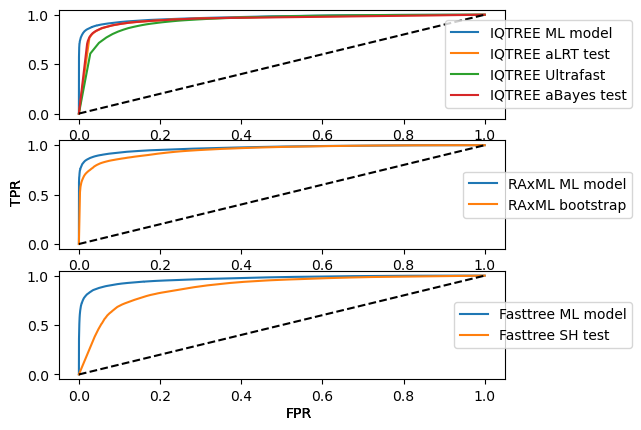

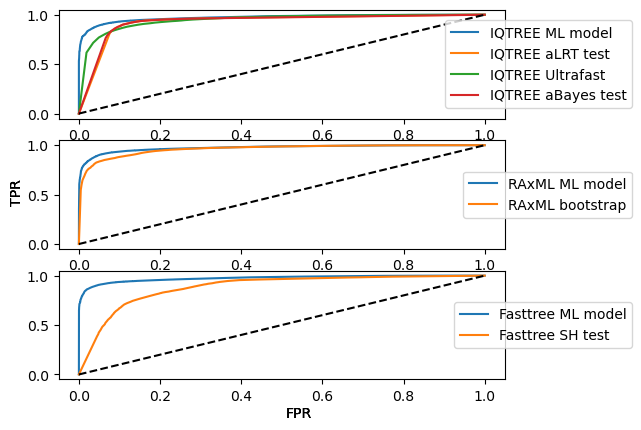

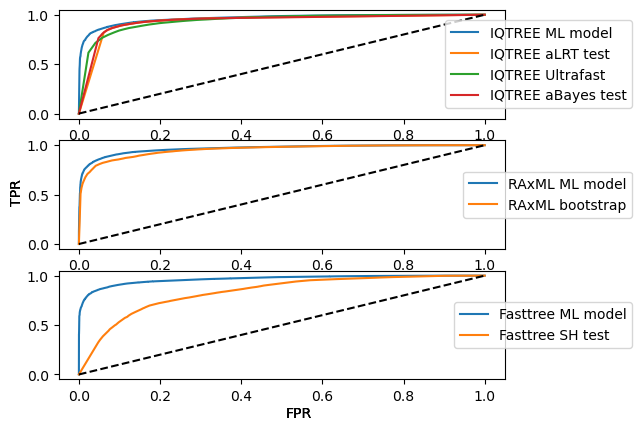

In [26]:
programs_roc_plots(iqtree_test_data,raxml_test_data,fasttree_test_data)
programs_roc_plots(iqtree_val_upgrade_data,raxml_val_upgrade_data,fasttree_val_upgrade_data)
programs_roc_plots(iqtree_val_downgrade_data,raxml_val_downgrade_data,fasttree_val_downgrade_data)

In [77]:
main_results_path = '/Users/noa/Workspace/bootstrap_results/remote_results/ML_results'
iqtree_models_performance_data = pd.read_csv(f"{main_results_path}/iqtree/final_model_performance.tsv",sep='\t')
raxml_models_performance_data = pd.read_csv(f"{main_results_path}/raxml/final_model_performance.tsv",sep='\t')
fasttree_models_performance_data = pd.read_csv(f"/{main_results_path}/fasttree/final_model_performance.tsv",sep='\t')




In [79]:
iqtree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features+ ultrafast bootstrap support','feature_aLRT_iqtree_support-raw_only_boot': 'Raw aLRT support',
                    'feature_aLRT_iqtree_support-only_boot':"Calibrated aLRT support",'feature_aLRT_iqtree_support-inc_boot':"All features+ aLRT support",
                    'feature_aBayes_iqtree_support-raw_only_boot': 'Raw aBayes support',
                    'feature_aBayes_iqtree_support-only_boot':"Calibrated aaBayes support",'feature_aBayes_iqtree_support-inc_boot':"All features+ aBayes support"
                    
            
                   }

iqtree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features+ ultrafast bootstrap support','feature_aLRT_iqtree_support-raw_only_boot': 'Raw aLRT support',
                    'feature_aLRT_iqtree_support-only_boot':"Calibrated aLRT support",'feature_aLRT_iqtree_support-inc_boot':"All features+ aLRT support",
                    'feature_aBayes_iqtree_support-raw_only_boot': 'Raw aBayes support',
                    'feature_aBayes_iqtree_support-only_boot':"Calibrated aaBayes support",'feature_aBayes_iqtree_support-inc_boot':"All features+ aBayes support"
                    
            
                   }

raxml_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features + ultrafast bootstrap support',           
                   }
fasttree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw SH support','bootstrap_support-only_boot':'Calibrated SH support',
                    'bootstrap_support-inc_boot':'All features + SH support',           
                   }
translate_datasets = {'val_upgrade':'Validation-JTT -> GTR+F+I+G',
                     'val_downgrade':'Validation-GTR+F+I+G -> JTT',
                      'val_standard':'Validation-control',
                      'test':'Test',
                      'train':'Train'
                     }
    

def edit_performance(models_performance_data, translation_dict, out_path):
    models_performance_data["concatenated_model"] = models_performance_data['analysis_type'].astype(str) +"-"+ models_performance_data["name"]
    models_performance_data["description"] = models_performance_data["concatenated_model"].apply(lambda x: translation_dict[x])
    models_performance_data["FPR"] = models_performance_data["fp_0.5"]/(models_performance_data["tn_0.5"]+models_performance_data["fp_0.5"])
    models_performance_data["FNR"] = models_performance_data["fn_0.5"]/(models_performance_data["tp_0.5"]+models_performance_data["fn_0.5"])
    models_performance_data["dataset"] = models_performance_data["dataset"].apply(lambda x: translate_datasets[x])
    out_df = models_performance_data[["description","dataset","AUC","logloss","brier_loss","mcc_0.5","FPR","FNR"]]
    out_df.to_csv(out_path,sep='\t')



In [80]:
edit_performance(iqtree_models_performance_data, iqtree_translation_dict, out_path = os.path.join(main_results_path,"iqtree/performance_text.tsv"))
edit_performance(fasttree_models_performance_data, fasttree_translation_dict, out_path = os.path.join(main_results_path,"fasttree/performance_text.tsv"))
edit_performance(raxml_models_performance_data, raxml_translation_dict, out_path = os.path.join(main_results_path,"raxml/performance_text.tsv"))